## Roc-auc hoặc MSE đơn biến (hoặc bất kỳ số liệu nào khác)

Quy trình này hoạt động như sau:

- Đầu tiên, xây dựng một decision tree (DT) cho mỗi đặc trưng để dự đoán mục tiêu
- Thứ hai, đưa ra dự đoán với DT và đặc trưng đã đề cập
- Thứ ba, đo chất lượng của dự đoán đó, có thể là roc-auc, mse hoặc bất kỳ số liệu nào
- Thứ tư, xếp hạng các đặc trưng theo số liệu học máy (roc-auc hoặc mse)
- Chọn ra các đặc trung có xếp hạng cao nhất

Chúng ta sẽ minh họa cách lựa chọn đặc trưng dựa trên roc-auc hoặc mse đơn biến.

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

## Phân loại

In [12]:
# load tập dữ liệu
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [13]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Quan trọng**

Trong tất cả các quy trình lựa chọn đặc trưng, chỉ nên chọn các đặc trưng bằng cách kiểm tra tập huấn luyện, điều này giúp tránh overfit.

In [14]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

### Xác định roc-auc đơn biến

In [16]:
# xác định roc-auc cho từng đặc trưng

# chúng ta lưu trữ các giá trị roc-auc ở đây
roc_values = []

# lặp qua từng đặc trưng trong tập dữ liệu
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
for feature in X_train.columns:

    # huấn luyện phân loại DT
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # có các dự đoán
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # tính và lưu trữ roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# hiển thị kết quả
roc_values[0:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

<details><summary> Gợi ý </summary>

[DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

</details>

Text(0, 0.5, 'roc-auc')

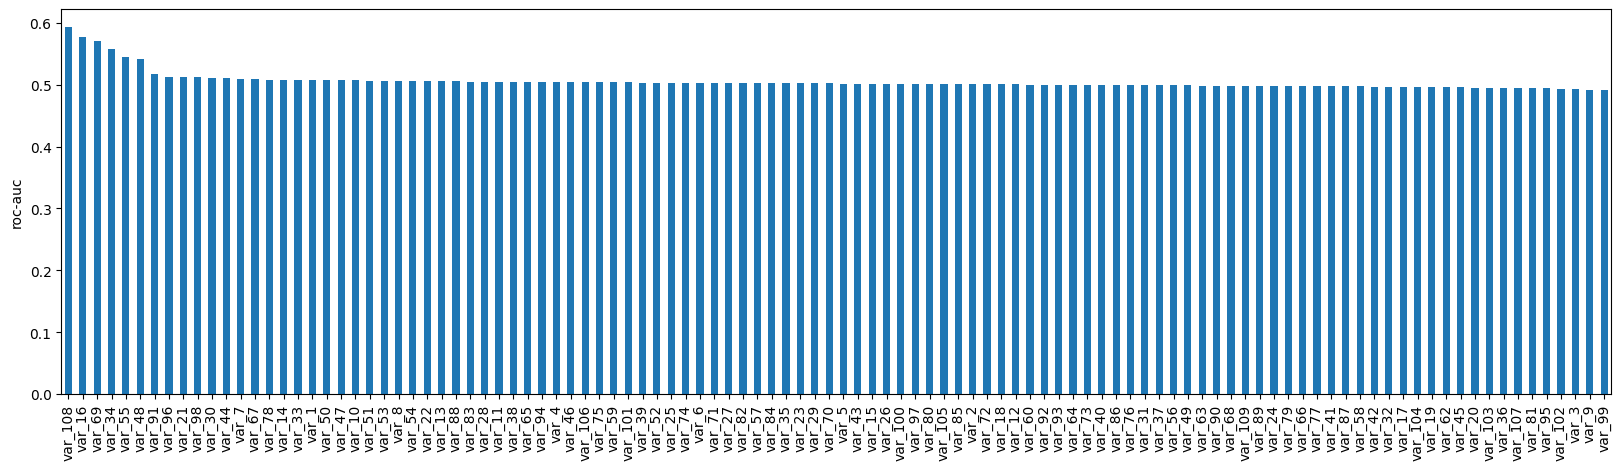

In [19]:
# bây giờ hãy:

# 1) nắm bắt các giá trị roc-auc trong pandas series
# 2) thêm tên biến vào chỉ số
# 3) sắp xếp các đặc trưng dựa trên roc-auc
# 4) và vẽ biểu đồ var
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

<details><summary> Gợi ý </summary>

[sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html)

</details>

In [20]:
# giá trị roc-auc 0.5 thể hiện quyeetss định ngẫu nhiên
# hãy kiểm tra xem có bao nhiêu đặc trưng cho thấy giá trị roc-auc
# cao hơn ngẫu nhiên

len(roc_values[roc_values > 0.5])

67

Trong số 108 đặc trưng, có 67 đặc trưng cho thấy chất lượng dự đoán cao hơn 0.5

Chúng ta có thể điều chỉnh tham số của DT để có dự đoán tốt hơn, như vậy các chỉ số cũng đáng tin hơn.

### Lựa chọn đặc trưng có roc-auc > 0.5

In [21]:
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [22]:
# lựa chọn các đặc trưng trong dataframes
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((35000, 67), (15000, 67))

<details><summary> Gợi ý </summary>

Sử dụng ```selected_features``` ở trên

</details>

## Phần mở rộng cho Hồi quy

In [23]:
# load tập dữ liệu

data = pd.read_csv('houseprice.csv')
data.shape

(1460, 81)

In [24]:
# Thực tế, nên lựa chọn đặc trưng sau khi tiền xử lý dữ liệu,
# như vậy, tất cả các biến hạng mục được mã hóa thành số,
# sau đó chúng ta có thể đánh giá tính tất định của mục tiêu

# để đơn giản, ở đây chúng ta sẽ chỉ sử dụng biến dạng số 
# để chọn các cột số:
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

<details><summary> Gợi ý </summary>

Sử dụng ```numerical_vars``` ở trên

</details>

In [25]:
# tách thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

### Xác định mse đơn biến

In [27]:
# xác định mse cho từng đặc trưng

# chúng ta lưu trữ các giá trị mse ở đây
mse_values = []

# lặp qua từng biến
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
for feature in X_train.columns:
    
    # huấn luyện DT
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # đưa ra dự đoán
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    
    # xác định mse và lưu trữ nó
    mse_values.append(mean_squared_error(y_test, y_scored))
    
    
# hiển thị kết quả
mse_values[0:10]

[13268032828.324202,
 6898370695.296803,
 10609376845.369864,
 9385598677.986301,
 3647495724.977169,
 8718641594.840183,
 9600883944.490868,
 9527242631.705479,
 8157366397.984018,
 8205156911.853881]

<details><summary> Gợi ý </summary>

[DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

[mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

</details>

<Axes: >

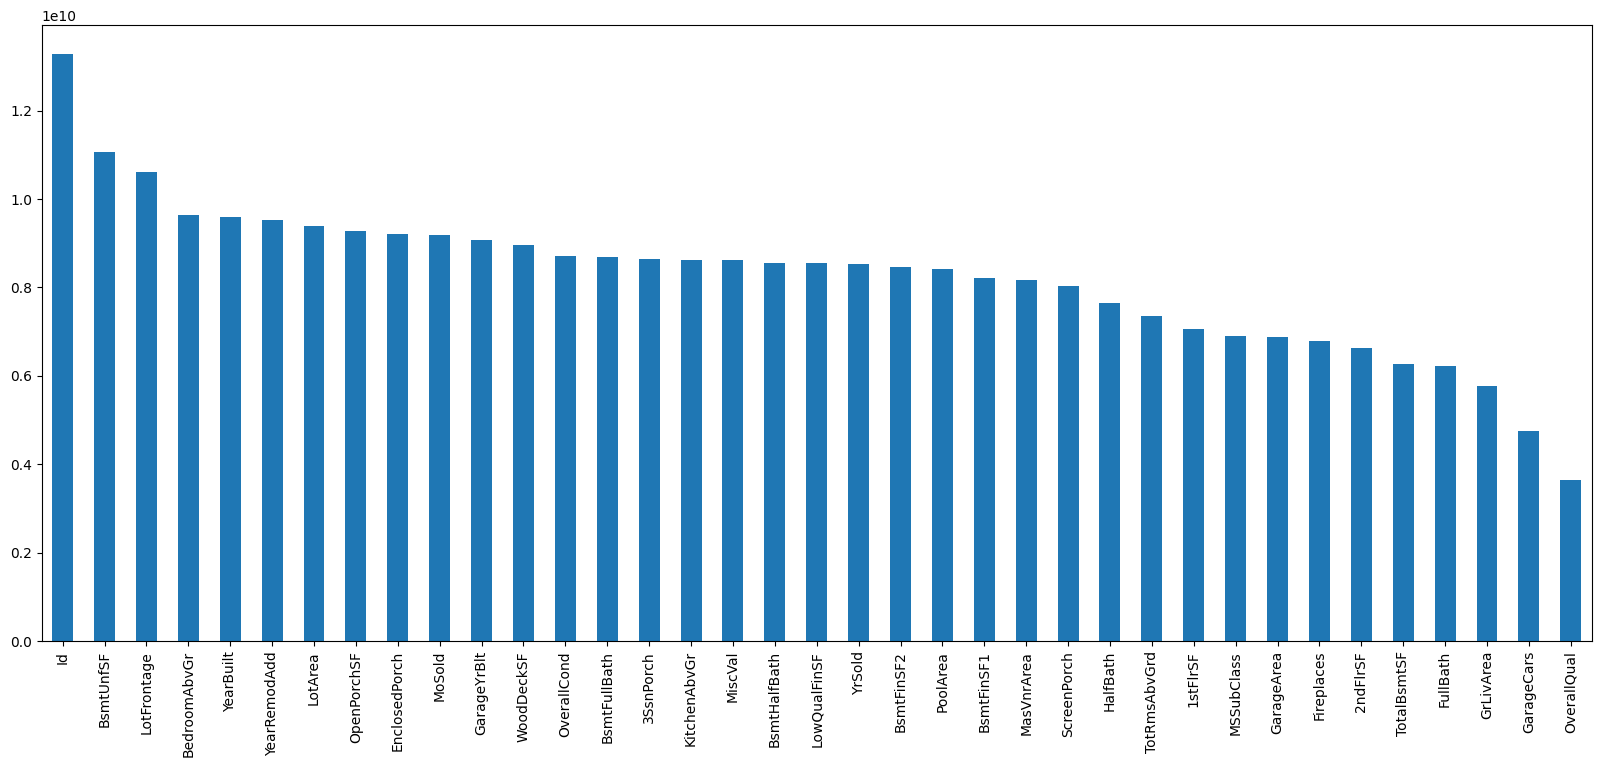

In [28]:
# giờ hãy:

# 1) nắm bắt các giá trị mse trong pandas series
# 2) thêm tên biến vào chỉ số
# 3) sắp xếp các đặc trưng theo mse
# 4) và vẽ biểu đồ var
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

<details><summary> Gợi ý </summary>

[sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html)

</details>

Với hồi quy, mse càng nhỏ thì chất lượng mô hình càng tốt.

Chúng ta cần một ngưỡng hoặc giới hạn để để lựa chọn đặc trưng. Chúng ta sẽ chọn các đặc trưng có mse thấp hơn mse trung bình theo triển khai lựa chọn của Scikit-learn, điều này sẽ được đề cập trong notebook sau.

### Lựa chọn đặc trưng

In [29]:
selected_features = mse_values[mse_values < np.mean(mse_values)].index

selected_features

Index(['MSSubClass', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'ScreenPorch'],
      dtype='object')

In [30]:
# lựa chọn đặc trưng trong dataframes
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1022, 15), (438, 15))

<details><summary> Gợi ý </summary>

Sử dụng ```selected_features``` ở trên

</details>